Import google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check the content of the drive

In [ ]:
import os
data_path = "/content/drive/My Drive/car/"

# Check if files are available
print(os.listdir(data_path))

['bushra_data.csv', 'Ad_table (extra).csv', 'df_cleaned.csv', 'df_cleaned_dropped_color.csv', 'df_cleaned1.csv', 'final_cleaned_data.csv']


link to the file for easy access and read  "https://drive.google.com/drive/folders/1mE9KInanLW4FhNbfczpV9CwG7fkHkxEw?usp=sharing"

In [ ]:
import pandas as pd
import numpy as np

ad_table = pd.read_csv(data_path + "Ad_table (extra).csv")
ad_table.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Bentley,Arnage,10_1,10_1$$1,2018,4,Silver,2000.0,Saloon,60000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
1,Bentley,Arnage,10_1,10_1$$2,2018,6,Grey,2002.0,Saloon,44000,...,450.0,315,3116.0,1515.0,2125.0,5390.0,13.7 mpg,179 mph,5.0,4.0
2,Bentley,Arnage,10_1,10_1$$3,2017,11,Blue,2002.0,Saloon,55000,...,400.0,315,3116.0,1515.0,2125.0,5390.0,14.7 mpg,155 mph,5.0,4.0
3,Bentley,Arnage,10_1,10_1$$4,2018,4,Green,2003.0,Saloon,14000,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
4,Bentley,Arnage,10_1,10_1$$5,2017,11,Grey,2003.0,Saloon,61652,...,NaN,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0


Check the number of Unique values for each columns

In [ ]:
ad_table.nunique()

,0
Maker,88
Genmodel,896
Genmodel_ID,881
Adv_ID,268255
Adv_year,10
Adv_month,15
Color,22
Reg_year,26
Bodytype,18
Runned_Miles,72420


In [ ]:
check the year range of the data

In [ ]:
ad_table['Adv_year'].unique()

array([2018, 2017, 2020, 2021, 2016, 2015, 2014, 2019, 2013, 2012])

Checked for null values

In [ ]:
ad_table.isnull().sum()

,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_ID,0
Adv_year,0
Adv_month,0
Color,21875
Reg_year,7
Bodytype,954
Runned_Miles,1055


Since price is the target variable we delete all rows/records with empty price

In [ ]:
ad_table_cleaned_price = ad_table.dropna(subset=['Price'])

In [ ]:
print(ad_table_cleaned_price.isnull().sum())
ad_table_cleaned_price.size

Maker               0
 Genmodel           0
 Genmodel_ID        0
Adv_ID              0
Adv_year            0
Adv_month           0
Color           21867
Reg_year            0
Bodytype          943
Runned_Miles     1045
Engin_size       2046
Gearbox           155
Fuel_type         399
Price               0
Engine_power    30666
Annual_Tax      45530
Wheelbase       27933
Height          27736
Width           28015
Length          27736
Average_mpg     40788
Top_speed       42457
Seat_num         6443
Door_num         4489
dtype: int64


6410640

Drop unnecessay features not required for the predictive case study

In [ ]:
df_cleaned = ad_table_cleaned_price.drop(columns=["Annual_Tax", "Average_mpg", "Top_speed"]) #drops unnecessary columns
df_cleaned = df_cleaned.dropna(subset=["Engine_power", "Engin_size", "Fuel_type", "Bodytype"]) #drops empty rows in these columns


In [ ]:
df_cleaned.isnull().sum()

,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_ID,0
Adv_year,0
Adv_month,0
Color,19106
Reg_year,0
Bodytype,0
Runned_Miles,807


Save the new cleaned data

In [ ]:
from google.colab import drive

# Save session-level dataset to Google Drive
df_cleaned.to_csv("/content/drive/My Drive/car/df_cleaned.csv", index=False)

print("Session features saved successfully!")

Session features saved successfully!


Import the new cleaned data where prices is not null


In [ ]:
from google.colab import drive
import pandas as pd


# Load the saved session-level features
df_cleaned = pd.read_csv("/content/drive/My Drive/car/df_cleaned.csv")

print("Session features loaded successfully!")


Session features loaded successfully!


Check data types


In [ ]:
print(df_cleaned.dtypes)


Maker            object
 Genmodel        object
 Genmodel_ID     object
Adv_ID           object
Adv_year          int64
Adv_month         int64
Color            object
Reg_year        float64
Bodytype         object
Runned_Miles     object
Engin_size       object
Gearbox          object
Fuel_type        object
Price           float64
Engine_power    float64
Wheelbase       float64
Height          float64
Width           float64
Length          float64
Seat_num        float64
Door_num        float64
dtype: object


Convert Data Types in Python

In [ ]:
import pandas as pd

# Convert IDs to integer (if they are truly numerical)
df_cleaned["Genmodel_ID"] = pd.to_numeric(df_cleaned[" Genmodel_ID"], errors="coerce").astype("Int64")
df_cleaned["Adv_ID"] = pd.to_numeric(df_cleaned["Adv_ID"], errors="coerce").astype("Int64")

# Convert numeric columns (ensure proper numeric format)
numeric_cols = ["Runned_Miles", "Engin_size", "Wheelbase", "Height", "Width", "Length", "Seat_num", "Door_num"]

# Remove non-numeric characters and convert to numeric
df_cleaned["Runned_Miles"] = pd.to_numeric(df_cleaned["Runned_Miles"], errors="coerce")
df_cleaned["Engin_size"] = df_cleaned["Engin_size"].str.replace("L", "", regex=True).astype(float)


# Convert categorical columns
categorical_cols = ["Maker", " Genmodel", "Bodytype", "Fuel_type", "Gearbox", "Color"]

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype("category")

# Final Check
print(df_cleaned.dtypes)


Maker           category
 Genmodel       category
 Genmodel_ID      object
Adv_ID             Int64
Adv_year           int64
Adv_month          int64
Color           category
Reg_year         float64
Bodytype        category
Runned_Miles     float64
Engin_size       float64
Gearbox         category
Fuel_type       category
Price            float64
Engine_power     float64
Wheelbase        float64
Height           float64
Width            float64
Length           float64
Seat_num         float64
Door_num         float64
Genmodel_ID        Int64
dtype: object


Filling missing data

In [ ]:
numeric_cols = ["Runned_Miles", "Seat_num", "Door_num", "Wheelbase", "Height", "Width", "Length"]

# Fill missing values using the median within each group
df_cleaned[numeric_cols] = df_cleaned.groupby(["Maker", "Adv_year", "Bodytype"])[numeric_cols].transform(lambda x: x.fillna(x.median()))


<ipython-input-11-f43139d727ba>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[numeric_cols] = df_cleaned.groupby(["Maker", "Adv_year", "Bodytype"])[numeric_cols].transform(lambda x: x.fillna(x.median()))


for categorical

In [ ]:
# Ensure categorical columns are treated as strings before filling missing values
df_cleaned["Color"] = df_cleaned["Color"].astype(str)
df_cleaned["Gearbox"] = df_cleaned["Gearbox"].astype(str)

# Function to fill missing values with mode within each group
def fill_categorical_mode(group):
    mode_value = group.mode().iloc[0] if not group.mode().empty else "Unknown"
    return group.fillna(mode_value)

# Apply transformation to fill missing categorical values
df_cleaned["Color"] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype"])["Color"].transform(fill_categorical_mode)
df_cleaned["Gearbox"] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype"])["Gearbox"].transform(fill_categorical_mode)

# Convert back to category type for efficiency
df_cleaned["Color"] = df_cleaned["Color"].astype("category")
df_cleaned["Gearbox"] = df_cleaned["Gearbox"].astype("category")

# Check if missing values are resolved
print(df_cleaned[["Color", "Gearbox"]].isnull().sum())


<ipython-input-16-ad41f24e57fe>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned["Color"] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype"])["Color"].transform(fill_categorical_mode)
<ipython-input-16-ad41f24e57fe>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned["Gearbox"] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype"])["Gearbox"].transform(fill_categorical_mode)


Color      0
Gearbox    0
dtype: int64


In [ ]:
df_cleaned.isnull().sum()

,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_ID,235221
Adv_year,0
Adv_month,0
Color,0
Reg_year,0
Bodytype,0
Runned_Miles,0


Drop AdvID and Genmode_id columns since they are not relevant to the case study

In [ ]:
df_cleaned = df_cleaned.drop(columns=["Adv_ID", "Genmodel_ID"])


Handling Missing Numeric Columns (Wheelbase, Height, Width, etc.)

In [ ]:
numeric_cols = ["Wheelbase", "Height", "Width", "Length", "Seat_num"]

df_cleaned[numeric_cols] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype", "Door_num",])[numeric_cols].transform(lambda x: x.fillna(x.median()))


<ipython-input-20-7fe3d3e88911>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned[numeric_cols] = df_cleaned.groupby(["Maker", " Genmodel", "Bodytype", "Door_num",])[numeric_cols].transform(lambda x: x.fillna(x.median()))


In [ ]:
df_cleaned.shape

(235221, 20)

Plot the spread of the data

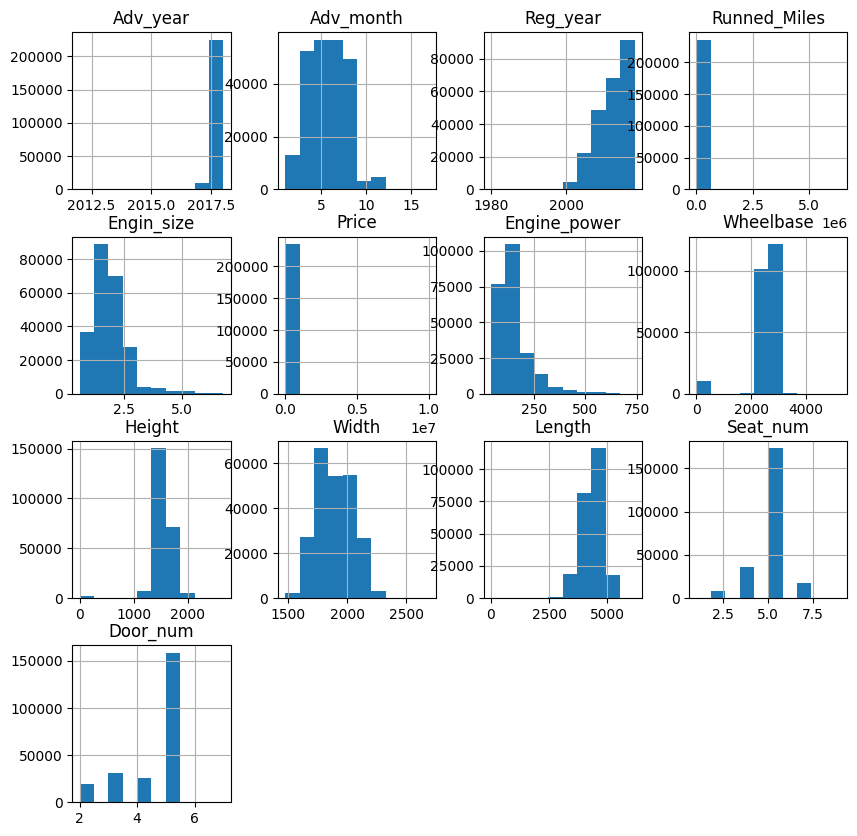

In [ ]:
import matplotlib.pyplot as plt
df_cleaned.hist(figsize=(10, 10))
plt.show()

In [ ]:
df_cleaned.describe()

,Adv_year,Adv_month,Reg_year,Runned_Miles,Engin_size,Price,Engine_power,Wheelbase,Height,Width,Length,Seat_num,Door_num
count,235221.000000,235221.000000,235221.000000,2.352210e+05,235221.000000,2.352210e+05,235221.00000,235187.000000,235188.000000,235175.000000,235188.000000,235218.000000,235221.000000
mean,2017.952976,5.715110,2012.271039,5.071189e+04,1.907790,1.325938e+04,150.62236,2526.198236,1530.686804,1894.174695,4371.631072,4.907917,4.377369
std,0.229794,2.063356,4.271434,4.212832e+04,0.745306,2.831015e+04,84.48299,567.243758,186.130963,150.768076,430.218604,0.879702,0.998915
min,2012.000000,1.000000,1980.000000,2.000000e+00,0.600000,1.000000e+02,38.00000,0.000000,0.000000,1475.000000,0.000000,1.000000,2.000000
25%,2018.000000,4.000000,2009.000000,1.667600e+04,1.400000,4.495000e+03,99.00000,2510.000000,1458.000000,1780.000000,4078.000000,5.000000,4.000000
50%,2018.000000,5.000000,2013.000000,4.356900e+04,1.700000,8.500000e+03,128.00000,2630.000000,1495.000000,1880.000000,4380.000000,5.000000,5.000000
75%,2018.000000,7.000000,2016.000000,7.780000e+04,2.000000,1.550000e+04,175.00000,2746.000000,1626.000000,2019.000000,4672.000000,5.000000,5.000000
max,2018.000000,17.000000,2018.000000,6.363342e+06,6.800000,9.999999e+06,740.00000,5246.000000,2660.000000,2690.000000,6165.000000,9.000000,7.000000


Plot a 2D correlation matrix of the data to check relationship

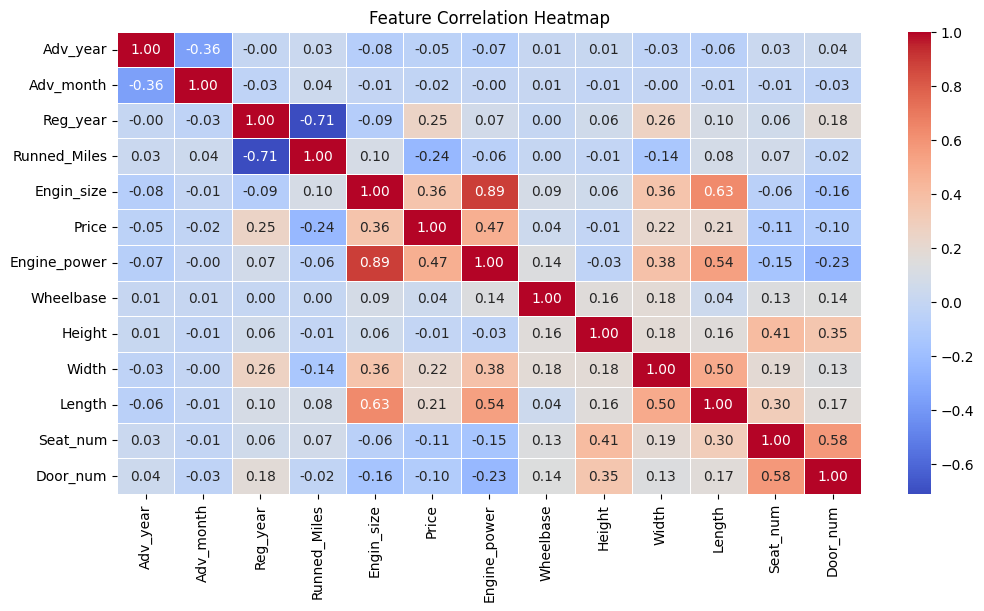

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df_cleaned.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Print Top 10 Highest and Lowest Prices

In [ ]:
# Print top 10 highest-priced cars
print("Top 10 Highest Prices:")
print(df_cleaned[["Maker", " Genmodel", "Price", "Reg_year"]].sort_values(by="Price", ascending=False).head(10))

# Print top 10 lowest-priced cars
print("\nTop 10 Lowest Prices:")
print(df_cleaned[["Maker", " Genmodel", "Price","Reg_year"]].sort_values(by="Price", ascending=True).head(10))


Top 10 Highest Prices:
          Maker  Genmodel      Price  Reg_year
94560   McLaren     675LT  9999999.0    2016.0
94583   McLaren        P1  1920000.0    2016.0
94584   McLaren        P1  1450000.0    2015.0
94582   McLaren        P1  1399950.0    2013.0
151855     Audi        R8   999999.0    2016.0
11872   Ferrari       599   650000.0    2011.0
12126   Ferrari       458   625000.0    2015.0
129240  Porsche       911   549995.0    2018.0
129369  Porsche       911   539995.0    2018.0
130420  Porsche       911   535000.0    2018.0

Top 10 Lowest Prices:
             Maker  Genmodel  Price  Reg_year
202234    Vauxhall     Astra  100.0    2004.0
208808    Vauxhall     Corsa  100.0    2011.0
136897     Renault      Clio  100.0    2002.0
30973         Ford        Ka  100.0    2003.0
199899    Vauxhall    Zafira  100.0    2002.0
82439        Lexus   IS 220d  123.0    2006.0
25904         Ford     Focus  125.0    2004.0
126840     Peugeot    206 CC  150.0    2002.0
109604      Nissan     

In [ ]:
# Count the number of cars with Price < 1000
num_low_price_cars = df_cleaned[df_cleaned["Price"] < 1000].shape[0]

print(f"Number of cars priced below $1,000: {num_low_price_cars}")


Number of cars priced below $1,000: 8127


In [ ]:
df_low_price = df_cleaned[df_cleaned["Price"] < 1000]

# Check most common brands with extremely low prices
print(df_low_price["Maker"].value_counts().head(10))

# Check most common models
print(df_low_price[" Genmodel"].value_counts().head(10))


Maker
Ford          2130
Vauxhall      1046
Peugeot        507
Volkswagen     495
Renault        482
Nissan         453
Citroen        439
Fiat           290
Honda          225
Toyota         215
Name: count, dtype: int64
 Genmodel
Focus     791
Fiesta    489
Astra     421
Ka        385
Micra     273
Corsa     261
Mondeo    210
Golf      187
Megane    178
206       142
Name: count, dtype: int64


Feature Engineering: Car Age + Mileage Depreciation

In [ ]:
df_cleaned["Car_Age"] = df_cleaned["Adv_year"] - df_cleaned["Reg_year"]

In [ ]:
df_cleaned["Mileage_per_Year"] = df_cleaned["Runned_Miles"] / df_cleaned["Car_Age"]


Normalize Mileage (Avoid Large Scales)
Since Runned_Miles can have very high values (e.g., 200,000+ miles), scaling it can help the model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned["Runned_Miles_Scaled"] = scaler.fit_transform(df_cleaned[["Runned_Miles"]])


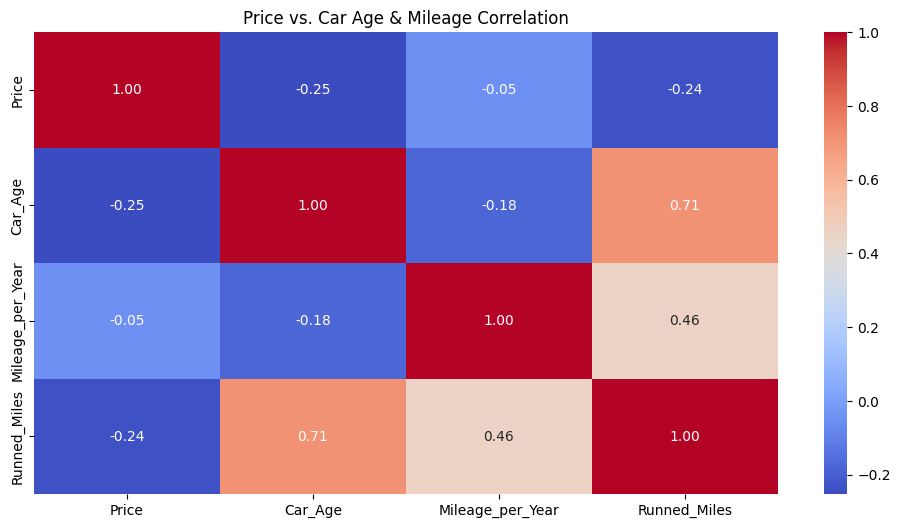

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned[["Price", "Car_Age", "Mileage_per_Year", "Runned_Miles"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Price vs. Car Age & Mileage Correlation")
plt.show()


In [ ]:
df_cleaned.drop(columns=["Mileage_per_Year"], inplace=True)

In [ ]:
df_cleaned.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,Price,Engine_power,Wheelbase,Height,Width,Length,Seat_num,Door_num,Car_Age,Runned_Miles_Scaled
0,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000.0,6.8,...,28750.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,0.006914
1,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000.0,6.8,...,29999.0,400.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,0.008643
2,Bentley,Arnage,10_1,2017,12,Blue,2002.0,Saloon,55000.0,6.8,...,24950.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,0.008643
3,Bentley,Arnage,10_1,2018,8,Green,2002.0,Saloon,67000.0,6.8,...,29995.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,0.010529
4,Bentley,Arnage,10_1,2018,6,Silver,2002.0,Saloon,52000.0,6.8,...,26990.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,0.008171


In [ ]:
df_cleaned.shape

(235221, 22)

Save current processed data

In [ ]:
from google.colab import drive

# Save session-level dataset to Google Drive
df_cleaned.to_csv("/content/drive/My Drive/car/df_cleaned1.csv", index=False)

print("Session features saved successfully!")

Session features saved successfully!


Fetch current processed data

In [ ]:
from google.colab import drive
import pandas as pd


# Load the saved session-level features
df_cleaned1 = pd.read_csv("/content/drive/My Drive/car/df_cleaned1.csv")

print("Session features loaded successfully!")


Session features loaded successfully!


Correlation for price and color

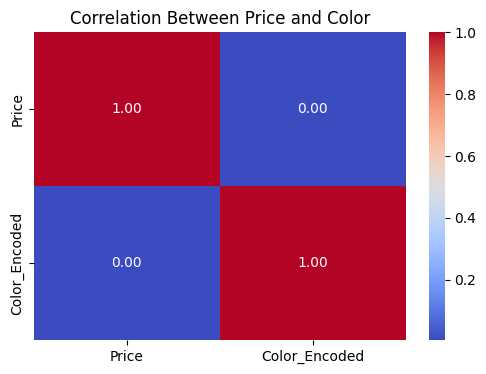

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Label Encode Color (Assigns a number to each color)
df_cleaned1["Color_Encoded"] = LabelEncoder().fit_transform(df_cleaned1["Color"])

# Compute correlation
correlation_matrix = df_cleaned1[["Price", "Color_Encoded"]].corr()

# Plot Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Price and Color")
plt.show()


Based on weak correlation, we try to do one-hot encoding to check if there exist relationship on individual colors

In [ ]:
import pandas as pd

# One-Hot Encode the 'Color' column (creates separate columns for each unique color)
df_cleaned1 = pd.get_dummies(df_cleaned1, columns=["Color"], drop_first=True)  # Drop first to avoid multicollinearity

# Check new dataframe structure
print(df_cleaned1.head())


     Maker  Genmodel  Genmodel_ID  Adv_year  Adv_month  Reg_year Bodytype  \
0  Bentley    Arnage         10_1      2018          6    2002.0   Saloon   
1  Bentley    Arnage         10_1      2017         11    2002.0   Saloon   
2  Bentley    Arnage         10_1      2017         12    2002.0   Saloon   
3  Bentley    Arnage         10_1      2018          8    2002.0   Saloon   
4  Bentley    Arnage         10_1      2018          6    2002.0   Saloon   

   Runned_Miles  Engin_size    Gearbox  ... Color_Multicolour  Color_Navy  \
0       44000.0         6.8  Automatic  ...             False       False   
1       55000.0         6.8  Automatic  ...             False       False   
2       55000.0         6.8  Automatic  ...             False       False   
3       67000.0         6.8  Automatic  ...             False       False   
4       52000.0         6.8  Automatic  ...             False       False   

   Color_Orange  Color_Pink  Color_Purple  Color_Red  Color_Silver  \
0   

Plot correlation between Car colors and Price

<ipython-input-20-59fd25c0791e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_correlation.index, y=color_correlation.values, palette="coolwarm")


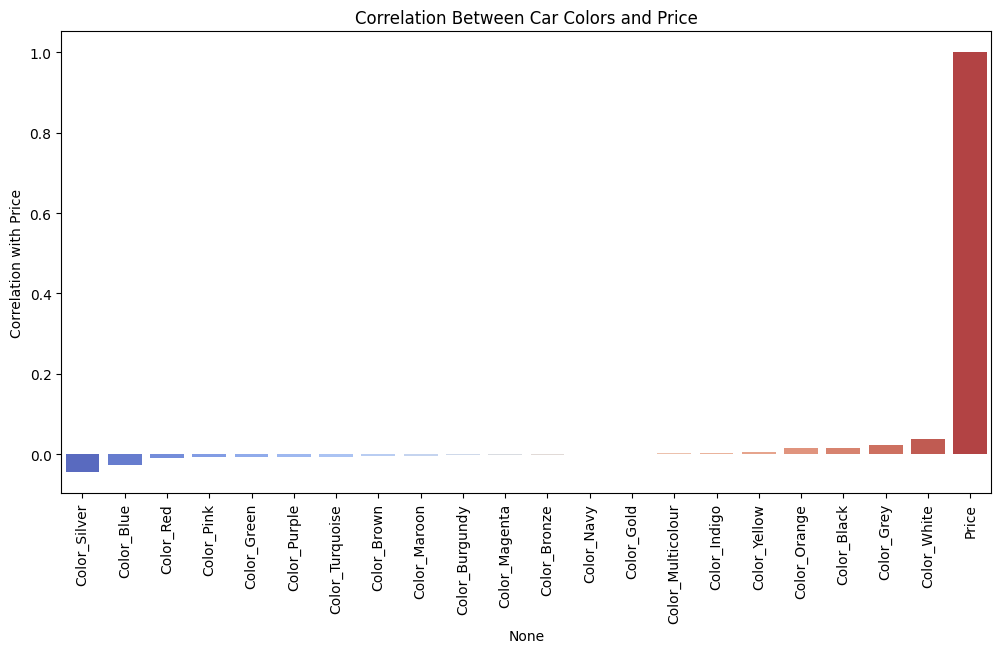

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only price and one-hot encoded color columns
color_columns = [col for col in df_cleaned1.columns if "Color_" in col]
df_color_price = df_cleaned1[["Price"] + color_columns]

# Compute correlation of colors with Price
color_correlation = df_color_price.corr()["Price"].sort_values()

# Plot color correlations with Price
plt.figure(figsize=(12, 6))
sns.barplot(x=color_correlation.index, y=color_correlation.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation Between Car Colors and Price")
plt.ylabel("Correlation with Price")
plt.show()


Check Price average by car color

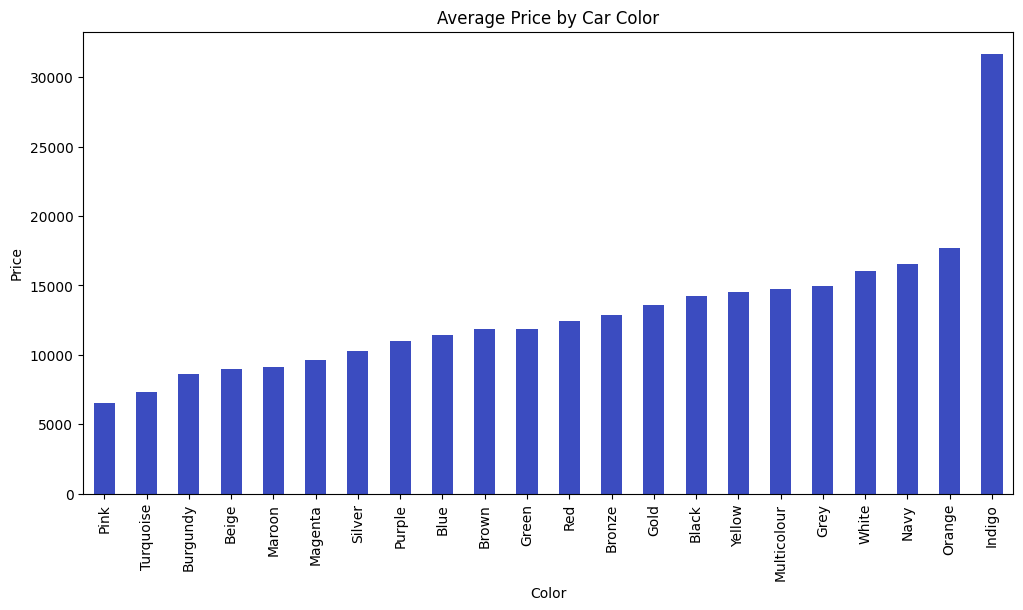

In [ ]:
df_cleaned1.groupby("Color")["Price"].mean().sort_values().plot(kind="bar", figsize=(12,6), colormap="coolwarm")
plt.title("Average Price by Car Color")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


Drop colors

In [ ]:
df_cleaned1.drop(columns=[col for col in df_cleaned1.columns if "Color_" in col], inplace=True)


check for null values on the remaining dataset before data modelling

In [ ]:
df_cleaned1.isnull().sum()

,0
Maker,0
Genmodel,0
Genmodel_ID,0
Adv_year,0
Adv_month,0
Reg_year,0
Bodytype,0
Runned_Miles,0
Engin_size,0
Gearbox,0


In [ ]:
# Print top 10 highest-priced cars
print("Top 10 Highest Prices:")
print(df_cleaned1[["Maker",  "Price", "Reg_year", "Runned_Miles", "Runned_Miles_Scaled"]].sort_values(by="Price", ascending=False).head(10))

# Print top 10 lowest-priced cars
print("\nTop 10 Lowest Prices:")
print(df_cleaned1[["Maker", "Price","Reg_year", "Runned_Miles","Runned_Miles_Scaled"]].sort_values(by="Price", ascending=True).head(10))


Top 10 Highest Prices:
          Maker      Price  Reg_year  Runned_Miles  Runned_Miles_Scaled
94560   McLaren  9999999.0    2016.0         200.0             0.000031
94583   McLaren  1920000.0    2016.0         151.0             0.000023
94584   McLaren  1450000.0    2015.0        3360.0             0.000528
94582   McLaren  1399950.0    2013.0        1930.0             0.000303
151855     Audi   999999.0    2016.0        5000.0             0.000785
11872   Ferrari   650000.0    2011.0        4964.0             0.000780
12126   Ferrari   625000.0    2015.0          85.0             0.000013
129240  Porsche   549995.0    2018.0          50.0             0.000008
129369  Porsche   539995.0    2018.0         142.0             0.000022
130420  Porsche   535000.0    2018.0          37.0             0.000006

Top 10 Lowest Prices:
             Maker  Price  Reg_year  Runned_Miles  Runned_Miles_Scaled
202234    Vauxhall  100.0    2004.0      115000.0             0.018072
208808    Vauxhall  

In [ ]:
# Count rows where 'Maker' is 'McLaren'
mclaren_count = len(df_cleaned1[df_cleaned1["Maker"] == "McLaren"])

print(f"Number of rows where Maker is McLaren: {mclaren_count}")


Number of rows where Maker is McLaren: 157


In [ ]:


print(f"Number of rows in the dataset: {df_cleaned1.shape[0]}")


Number of rows in the dataset: 235221


In [ ]:
# Count rows where 'Maker' is 'McLaren'
mclaren_count = len(df_cleaned1[df_cleaned1["Maker"] == "Ferrari"])

print(f"Number of rows where Maker is Ferrari: {mclaren_count}")

Number of rows where Maker is Ferrari: 476


Save a copy of the cleaned dataset without colors

In [ ]:
from google.colab import drive
import pandas as pd


# Load the saved session-level features
df_cleaned1 = pd.read_csv("/content/drive/My Drive/car/df_cleaned_dropped_color.csv")

print("Session features loaded successfully!")

Session features loaded successfully!


In [ ]:
df_cleaned1.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Engine_power', 'Wheelbase', 'Height', 'Width',
       'Length', 'Seat_num', 'Door_num', 'Car_Age', 'Runned_Miles_Scaled'],
      dtype='object')

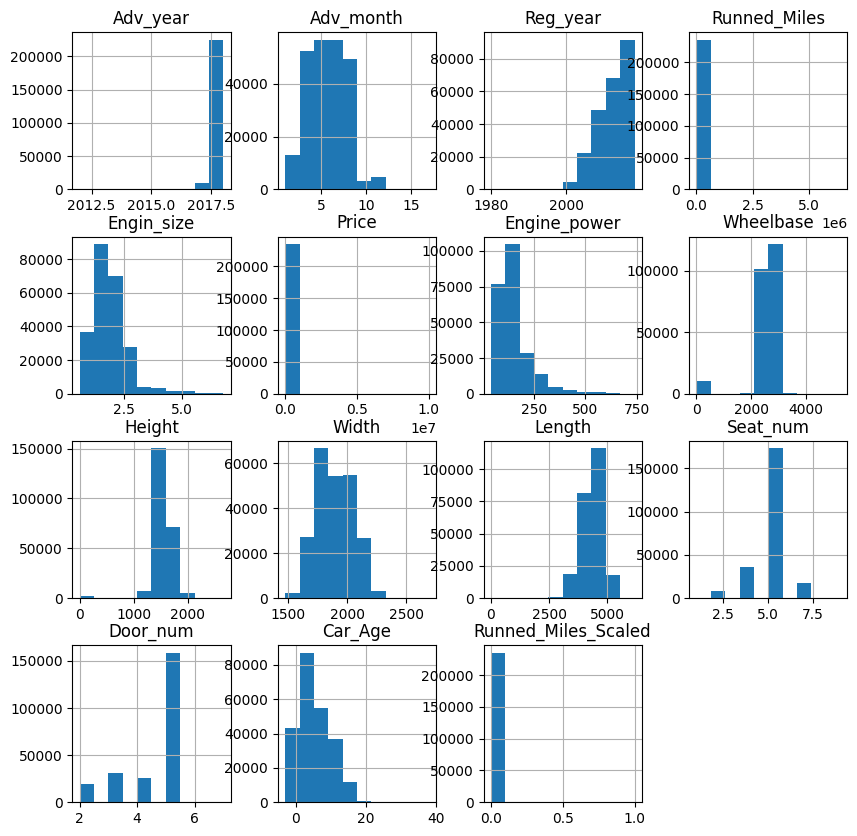

In [ ]:
import matplotlib.pyplot as plt
df_cleaned1.hist(figsize=(10, 10))
plt.show()

Log normailzation to scale down price and RunnedMiles due to variation

In [ ]:
# prompt: drop the Price_Normalized and do this import numpy as np
# df_cleaned["Price_Log"] = np.log1p(df_cleaned["Price"])  # log(Price + 1) to handle 0 values


import numpy as np
df_cleaned1["Price_Log"] = np.log1p(df_cleaned1["Price"])  # log(Price + 1) to handle 0 values


In [ ]:
df_cleaned1["Runned_Miles_Log"] = np.log1p(df_cleaned1["Runned_Miles"])
df_cleaned1 = df_cleaned1.drop(columns=["Runned_Miles_Scaled"])

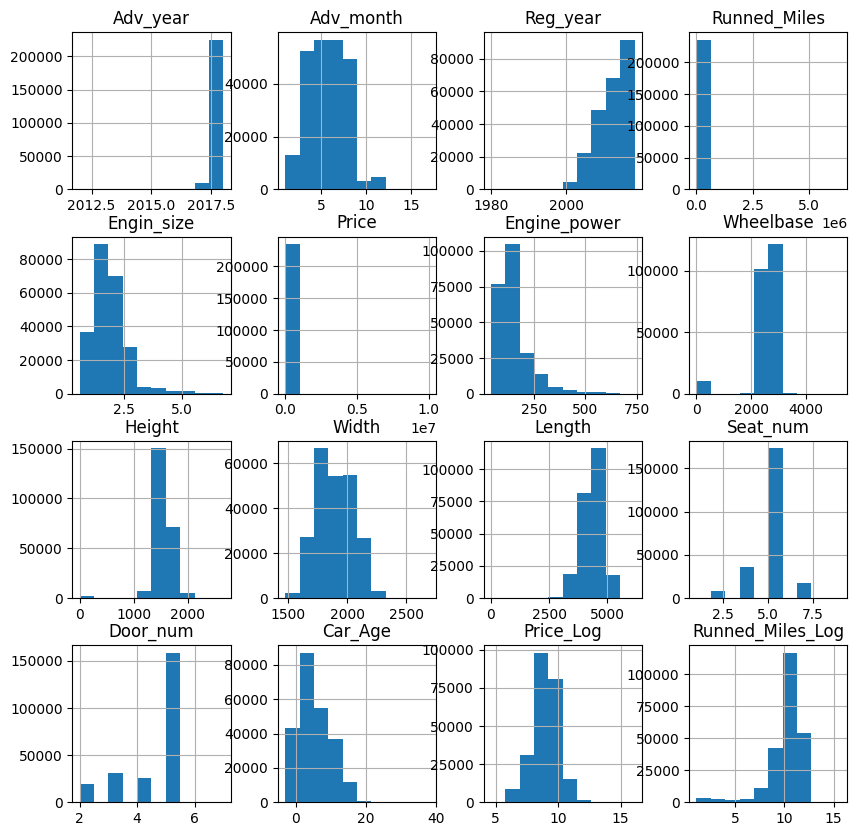

In [ ]:
import matplotlib.pyplot as plt
df_cleaned1.hist(figsize=(10, 10))
plt.show()

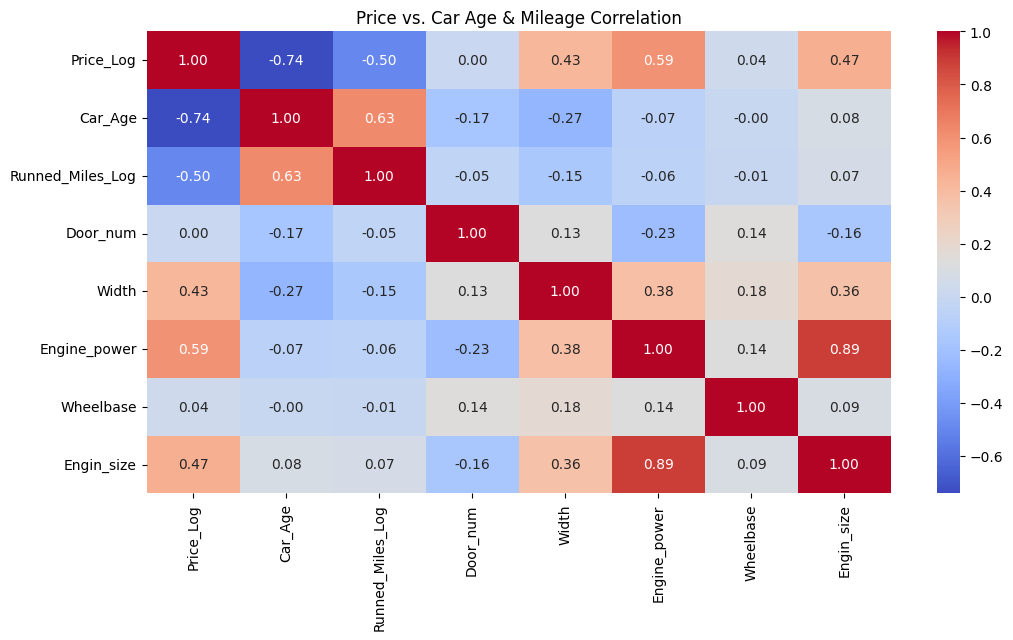

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned1[["Price_Log", "Car_Age", "Runned_Miles_Log", "Door_num", "Width", "Engine_power","Wheelbase","Engin_size"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Price vs. Car Age & Mileage Correlation")
plt.show()

In [ ]:
from google.colab import drive

# Save session-level dataset to Google Drive
df_cleaned1.to_csv("/content/drive/My Drive/car/df_cleaned1.csv", index=False)

print("Session features saved successfully!")

Session features saved successfully!


In [ ]:
import pandas as pd


# Load the saved session-level features
df_cleaned1 = pd.read_csv("/content/drive/My Drive/car/df_cleaned1.csv")

print("Session features loaded successfully!")
df_cleaned1.head()

Session features loaded successfully!


,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,Engine_power,Wheelbase,Height,Width,Length,Seat_num,Door_num,Car_Age,Price_Log,Runned_Miles_Log
0,Bentley,Arnage,10_1,2018,6,2002.0,Saloon,44000.0,6.8,Automatic,...,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.266428,10.691968
1,Bentley,Arnage,10_1,2017,11,2002.0,Saloon,55000.0,6.8,Automatic,...,400.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,10.308953,10.915107
2,Bentley,Arnage,10_1,2017,12,2002.0,Saloon,55000.0,6.8,Automatic,...,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,10.124669,10.915107
3,Bentley,Arnage,10_1,2018,8,2002.0,Saloon,67000.0,6.8,Automatic,...,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.308819,11.112463
4,Bentley,Arnage,10_1,2018,6,2002.0,Saloon,52000.0,6.8,Automatic,...,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.203259,10.859018


Convert Categorical Features to Numeric (Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_cols = ["Maker", " Genmodel", "Bodytype", "Gearbox", "Fuel_type"]
for col in categorical_cols:
    df_cleaned1[col] = LabelEncoder().fit_transform(df_cleaned1[col])


Train a Random Forest Model to Get Feature Importance

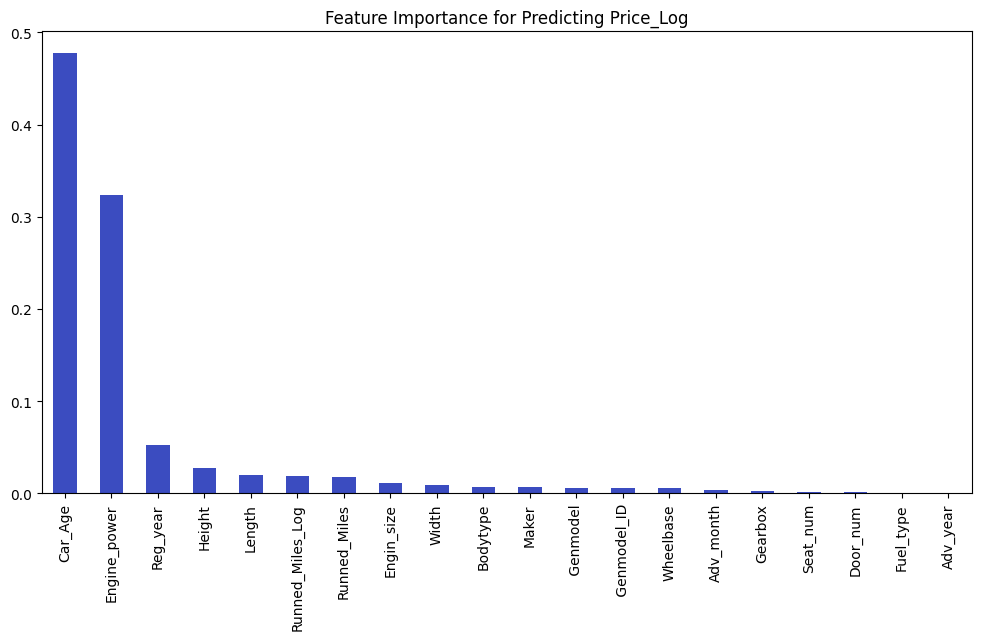

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df_cleaned1.drop(columns=["Price_Log", "Price"])  # Drop target variables
y = df_cleaned1["Price_Log"]  # Target variable

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance[:20].plot(kind="bar", colormap="coolwarm")
plt.title("Feature Importance for Predicting Price_Log")
plt.show()


drop columns that doesnt show importance

In [ ]:
df_cleaned1.drop(columns=[" Genmodel"], inplace=True)

In [ ]:
df_cleaned1.drop(columns=[" Genmodel_ID"], inplace=True)

In [ ]:
df_cleaned1.columns

Index(['Maker', 'Adv_year', 'Adv_month', 'Reg_year', 'Bodytype',
       'Runned_Miles', 'Engin_size', 'Gearbox', 'Fuel_type', 'Price',
       'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Seat_num',
       'Door_num', 'Car_Age', 'Price_Log', 'Runned_Miles_Log'],
      dtype='object')

In [ ]:
# Print top 10 highest-priced cars
print("Top 10 Highest Prices:")
print(df_cleaned1[["Maker",  "Price", "Reg_year", "Runned_Miles", "Runned_Miles_Log"]].sort_values(by="Price", ascending=False).head(10))

# Print top 10 lowest-priced cars
print("\nTop 10 Lowest Prices:")
print(df_cleaned1[["Maker", "Price","Reg_year", "Runned_Miles","Runned_Miles_Log"]].sort_values(by="Price", ascending=True).head(10))


Top 10 Highest Prices:
        Maker      Price  Reg_year  Runned_Miles  Runned_Miles_Log
94560      37  9999999.0    2016.0         200.0          5.303305
94583      37  1920000.0    2016.0         151.0          5.023881
94584      37  1450000.0    2015.0        3360.0          8.119994
94582      37  1399950.0    2013.0        1930.0          7.565793
151855      3   999999.0    2016.0        5000.0          8.517393
11872      15   650000.0    2011.0        4964.0          8.510169
12126      15   625000.0    2015.0          85.0          4.454347
129240     45   549995.0    2018.0          50.0          3.931826
129369     45   539995.0    2018.0         142.0          4.962845
130420     45   535000.0    2018.0          37.0          3.637586

Top 10 Lowest Prices:
        Maker  Price  Reg_year  Runned_Miles  Runned_Miles_Log
202234     59  100.0    2004.0      115000.0         11.652696
208808     59  100.0    2011.0       70000.0         11.156265
136897     47  100.0    2002

Drop rows of height, width and Length that are still null/empty

In [ ]:
df_cleanedx = df_cleaned1.dropna(subset=["Height", "Width", "Length"])

In [ ]:
df_cleaned1 = df_cleanedx

In [ ]:
df_cleaned1.to_csv("/content/drive/My Drive/car/final_cleaned_data.csv", index=False)

print("DataFrame saved as 'final_cleaned_data.csv' in your Google Drive.")


DataFrame saved as 'final_cleaned_data.csv' in your Google Drive.


**WE START TRAINING AHAHAHAHHA**

In [ ]:
import pandas as pd
import numpy as np
df_cleaned1 = pd.read_csv("/content/drive/My Drive/car/final_cleaned_data.csv")

print("Session features loaded successfully!")
df_cleaned1.head()

Session features loaded successfully!


,Maker,Adv_year,Adv_month,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Engine_power,Wheelbase,Height,Width,Length,Seat_num,Door_num,Car_Age,Price_Log,Runned_Miles_Log
0,5,2018,6,2002.0,13,44000.0,6.8,0,7,28750.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.266428,10.691968
1,5,2017,11,2002.0,13,55000.0,6.8,0,7,29999.0,400.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,10.308953,10.915107
2,5,2017,12,2002.0,13,55000.0,6.8,0,7,24950.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,15.0,10.124669,10.915107
3,5,2018,8,2002.0,13,67000.0,6.8,0,7,29995.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.308819,11.112463
4,5,2018,6,2002.0,13,52000.0,6.8,0,7,26990.0,450.0,3116.0,1515.0,2125.0,5390.0,5.0,4.0,16.0,10.203259,10.859018


 Verify Selected Features

In [ ]:
features = ['Maker', 'Bodytype', 'Engine_power', 'Height', 'Width', 'Length', 'Car_Age', 'Runned_Miles_Log']
target = 'Price_Log'

In [ ]:
df_cleaned = df_cleaned1

Step 2: Prepare Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical features properly
label_encoders = {}
for col in ["Maker", "Bodytype"]:
    label_encoders[col] = LabelEncoder()
    df_cleaned.loc[:, col] = label_encoders[col].fit_transform(df_cleaned[col])


# Define X (features) and y (target)
X = df_cleaned[features]
y = df_cleaned[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Define & Train Multiple Models in Sequence


In [ ]:
# Re-import necessary libraries
import joblib
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain models
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Now save the models
joblib.dump(linear_regression_model, "linear_regression_model.pkl")
joblib.dump(random_forest_model, "random_forest_model.pkl")
joblib.dump(decision_tree_model, "decision_tree_model.pkl")
joblib.dump(lasso_model, "lasso_model.pkl")


['lasso_model.pkl']

In [ ]:
import joblib

# Load models
linear_regression_model = joblib.load("linear_regression_model.pkl")
random_forest_model = joblib.load("random_forest_model.pkl")
decision_tree_model = joblib.load("decision_tree_model.pkl")
lasso_model = joblib.load("lasso_model.pkl")


Evaluate All Models

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Make predictions
y_pred_lr = linear_regression_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Compute RMSE manually
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Compute R² scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Compute MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Store results in a DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Decision Tree", "Lasso"],
    "RMSE": [rmse_lr, rmse_rf, rmse_dt, rmse_lasso],
    "R²": [r2_lr, r2_rf, r2_dt, r2_lasso],
    "MAE": [mae_lr, mae_rf, mae_dt, mae_lasso]
})

# Display results
print(results)


               Model      RMSE        R²       MAE
0  Linear Regression  0.375092  0.859978  0.265779
1      Random Forest  0.187708  0.964934  0.122836
2      Decision Tree  0.243665  0.940911  0.155934
3              Lasso  0.375141  0.859941  0.265583


Random Forest performs bettter

Compare Train & Test Scores

In [ ]:
# Get training and test scores
train_rmse = np.sqrt(mean_squared_error(y_train, random_forest_model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, random_forest_model.predict(X_test)))

print(f"Random Forest RMSE (Train): {train_rmse:.4f}")
print(f"Random Forest RMSE (Test): {test_rmse:.4f}")

# Check R² Scores
train_r2 = r2_score(y_train, random_forest_model.predict(X_train))
test_r2 = r2_score(y_test, random_forest_model.predict(X_test))

print(f"Random Forest R² (Train): {train_r2:.4f}")
print(f"Random Forest R² (Test): {test_r2:.4f}")


Random Forest RMSE (Train): 0.0763
Random Forest RMSE (Test): 0.1877
Random Forest R² (Train): 0.9942
Random Forest R² (Test): 0.9649


 Use Cross-Validation (More Reliable)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_forest_model, X_train, y_train, scoring="r2", cv=5)
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")


Cross-Validation R² Scores: [0.9642695  0.96318778 0.96333078 0.96388232 0.96437377]
Mean CV R²: 0.9638


visaulaize

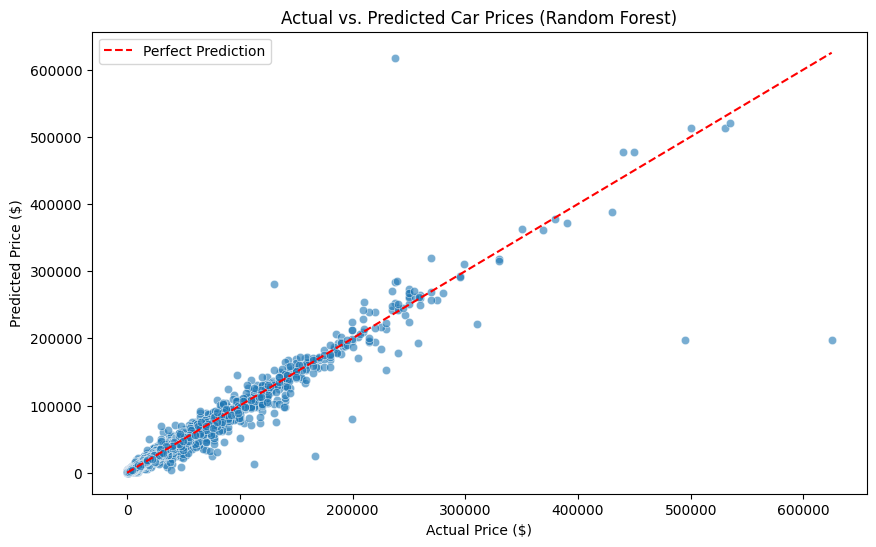

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For loading saved models

# Load the trained Random Forest model (if needed)
random_forest_model = joblib.load("random_forest_model.pkl")  # Ensure the correct path

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# Convert back from log scale to original price scale
y_test_original = np.expm1(y_test)  # Reverse log transformation
y_pred_original = np.expm1(y_pred_rf)

# Create a scatter plot to compare actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.6)
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='dashed', label="Perfect Prediction")

plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Car Prices (Random Forest)")
plt.legend()
plt.show()


Save train and test

In [ ]:
import joblib

# Define save path
save_path = "/content/drive/My Drive/car"

# Save data
joblib.dump(X_train, save_path + "X_train.pkl")
joblib.dump(X_test, save_path + "X_test.pkl")
joblib.dump(y_train, save_path + "y_train.pkl")
joblib.dump(y_test, save_path + "y_test.pkl")

print("Data saved to Google Drive!")


Data saved to Google Drive!


Lest create trends based on  final_cleaned_data.csv in Google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_cleaned = pd.read_csv("/content/drive/My Drive/car/final_cleaned_data.csv")

Price Trends Over Time (Adv year vs Price)

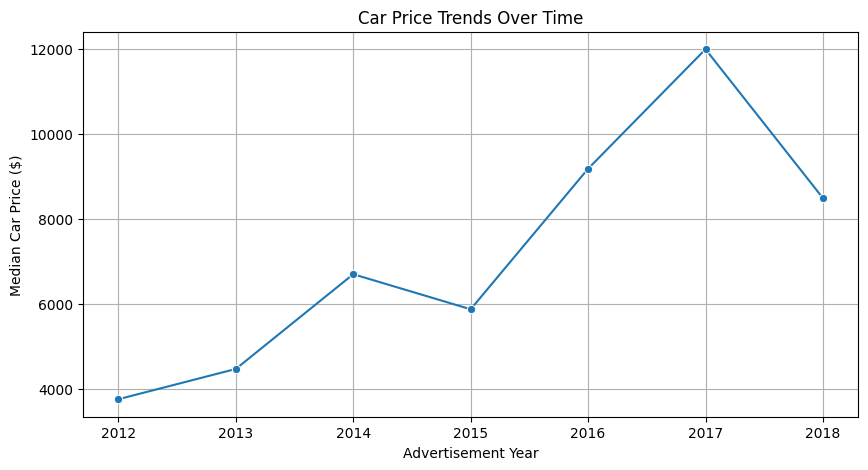

In [ ]:
# Group by Adv_year and calculate median price
price_trend = df_cleaned.groupby("Adv_year")["Price"].median()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=price_trend.index, y=price_trend.values, marker="o")
plt.xlabel("Advertisement Year")
plt.ylabel("Median Car Price ($)")
plt.title("Car Price Trends Over Time")
plt.grid(True)
plt.show()


Car Age vs. Price (Depreciation Trend)

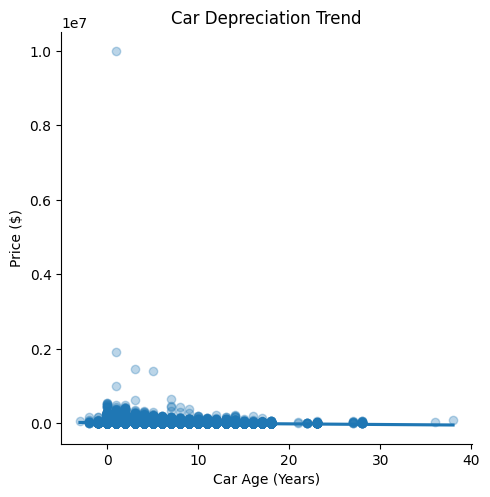

In [ ]:
sns.lmplot(x="Car_Age", y="Price", data=df_cleaned, scatter_kws={'alpha':0.3})
plt.xlabel("Car Age (Years)")
plt.ylabel("Price ($)")
plt.title("Car Depreciation Trend")
plt.show()


Mileage vs. Price (Wear & Tear Impact)

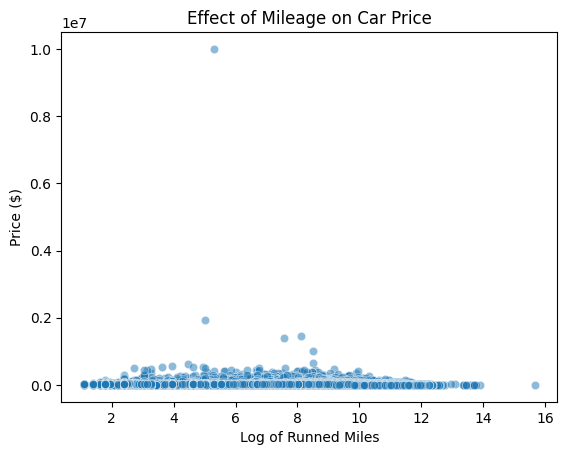

In [ ]:
sns.scatterplot(x=df_cleaned["Runned_Miles_Log"], y=df_cleaned["Price"], alpha=0.5)
plt.xlabel("Log of Runned Miles")
plt.ylabel("Price ($)")
plt.title("Effect of Mileage on Car Price")
plt.show()


In [ ]:
df_cleaned.columns

Index(['Maker', 'Adv_year', 'Adv_month', 'Reg_year', 'Bodytype',
       'Runned_Miles', 'Engin_size', 'Gearbox', 'Fuel_type', 'Price',
       'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Seat_num',
       'Door_num', 'Car_Age', 'Price_Log', 'Runned_Miles_Log'],
      dtype='object')

Most Common Car Brands in Listings

<ipython-input-14-f27d3a526fbe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers.index, y=top_makers.values, palette="viridis")


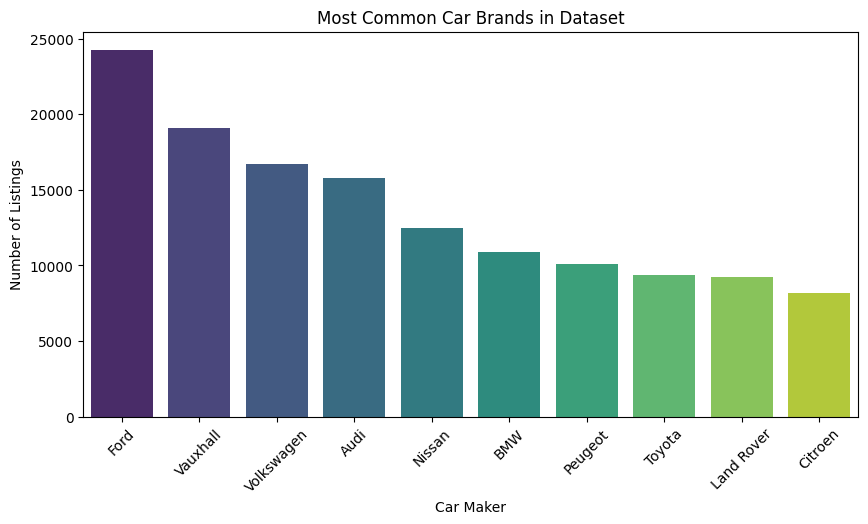

In [ ]:
import pandas as pd


# Load the saved session-level features
df_cleaned = pd.read_csv("/content/drive/My Drive/car/df_cleaned1.csv")

# Count top 10 most common car brands
top_makers = df_cleaned["Maker"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_makers.index, y=top_makers.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Car Maker")
plt.ylabel("Number of Listings")
plt.title("Most Common Car Brands in Dataset")
plt.show()

